# Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# styling , don't run this block if Scienceplot is not installed
#plt.style.use(['science','ieee','grid','no-latex'])

In [3]:
datalabels=  ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
             'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
data = pd.read_csv('adult.csv', header = None,names = datalabels)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It looks like there are no null values! Yay
- age, fnlwght, education-num, capital-gain, capital-loss are numerical columns.
- Everything else is categorical

In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Age min value is 17 years, max value is 90 while average value is 39
- fnlwgt seems unconclusive
- number of years of education. Min value is 1 year, max value is 16 year, average years of education is 10 yrs
- working hours range from 1 to 99 hours per week

In [6]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

plot twist: There are null values. They are encoded as ' ?'. (There is a space plus question mark. Be careful.) So more work. yay! 

In [7]:
# replacing all ? with Nan values
data.replace(' ?', np.NaN,inplace = True)

In [8]:
# cross check if ? are converted
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
# No of null elements in the dataset
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Now, clearly there are null values. We consider dropping the rows instead of imputation because percentage of missing values are not that much.

In [10]:
# data shape before dropping rows
data.shape

(32561, 15)

In [11]:
# Shape after dropping rows containing null values
data.dropna(inplace = True)
data.shape

(30162, 15)

In [12]:
# cross check if there are null values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Now there are no null values

# Exploratory Data Analysis

Let's understand the dataset

#### Balanceness of the dataset

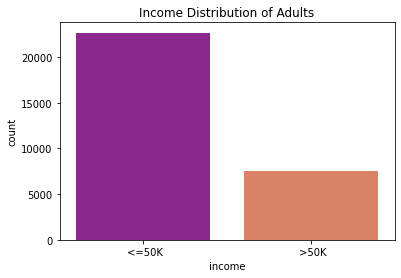

In [13]:
sns.countplot(x = 'income',data = data, palette = 'plasma')
plt.title('Income Distribution of Adults')
plt.show()

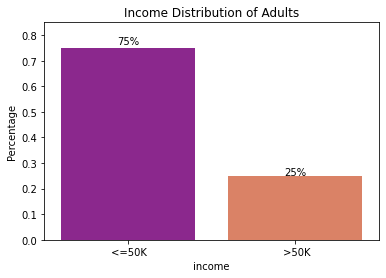

In [14]:
plt.title('Income Distribution of Adults')
eda_percentage = data['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='plasma')
ax.set_ylim([0, 0.85])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.grid(False)
#plt.savefig('Incomedistributionprior')

The dataset contains more samples that have income below 50k. Hence, stratified sampling should be done in train test split.

### Continuous Variables

**1. Age**

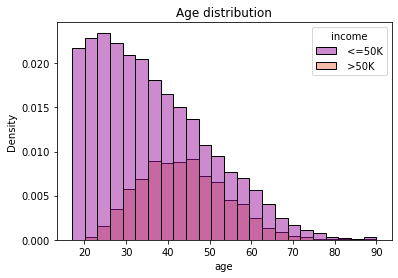

In [15]:
sns.histplot(data = data, x = 'age', bins = 24,stat = 'density',hue = 'income',palette = 'plasma')
plt.title('Age distribution')
plt.grid(False)
#plt.savefig('Agedistributionhistogram')
plt.show()

- Number of people earning below 50k falls of with age as expected
- More number of people earn above 50K at 45+, when their career matures which makes sense. And those who work 60 generally earn less which also makes sense as they may work for money post retirement

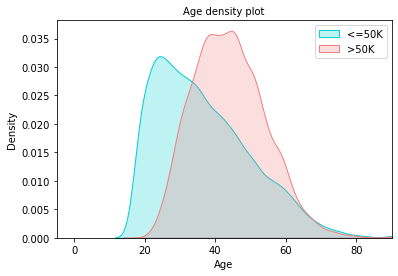

In [16]:
plt.figure()
ax = sns.kdeplot(data["age"][data.income == ' <=50K'], color="darkturquoise", shade=True)
sns.kdeplot(data["age"][data.income == ' >50K'], color="lightcoral", shade=True)
plt.legend(['<=50K', '>50K'])
plt.title('Age density plot',fontsize = 10)
ax.set(xlabel='Age')
plt.xlim(-5,90)
plt.grid(False)
plt.show()

Gaussian influence could be seen.

**2. Capital-gain and Capital-loss**

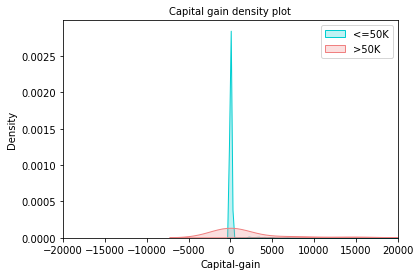

In [17]:
plt.figure()
ax = sns.kdeplot(data["capital-gain"][data.income == ' <=50K'], color="darkturquoise", shade=True)
sns.kdeplot(data["capital-gain"][data.income == ' >50K'], color="lightcoral", shade=True)
plt.legend(['<=50K', '>50K'])
plt.title('Capital gain density plot',fontsize = 10)
ax.set(xlabel='Capital-gain')
plt.xlim(-20000,20000)
plt.grid(False)
#plt.savefig('Capital-gain')
plt.show()

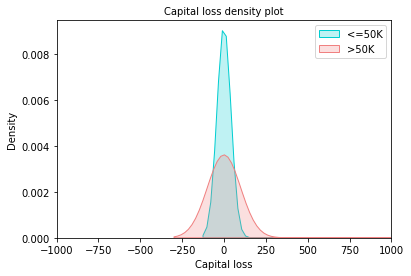

In [18]:
plt.figure()
ax = sns.kdeplot(data["capital-loss"][data.income == ' <=50K'], color="darkturquoise", shade=True)
sns.kdeplot(data["capital-loss"][data.income == ' >50K'], color="lightcoral", shade=True)
plt.legend(['<=50K', '>50K'])
plt.title('Capital loss density plot',fontsize = 10)
ax.set(xlabel='Capital loss')
plt.grid(False)
plt.xlim(-1000,1000)
#plt.savefig('Capital-loss')
plt.show()

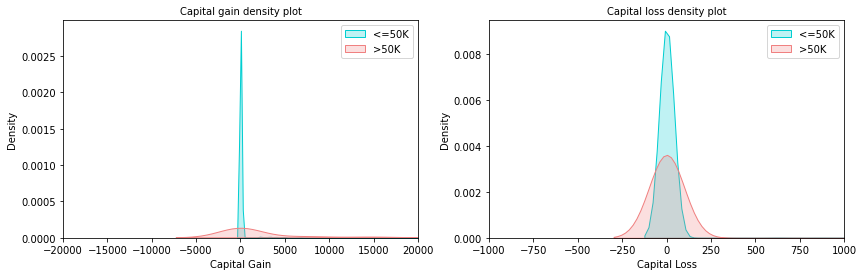

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_figheight(4)
fig.set_figwidth(14)

sns.kdeplot(data["capital-gain"][data.income == ' <=50K'], color="darkturquoise", shade=True, ax = ax[0])
sns.kdeplot(data["capital-gain"][data.income == ' >50K'], color="lightcoral", shade=True, ax = ax[0])
ax[0].legend(['<=50K', '>50K'])
ax[0].set_title('Capital gain density plot',fontsize = 10)
ax[0].set(xlabel='Capital Gain')
ax[0].set_xlim(-20000,20000)



sns.kdeplot(data["capital-loss"][data.income == ' <=50K'], color="darkturquoise", shade=True,ax = ax[1])
sns.kdeplot(data["capital-loss"][data.income == ' >50K'], color="lightcoral", shade=True, ax = ax[1])
plt.legend(['<=50K', '>50K'])
plt.title('Capital loss density plot',fontsize = 10)
ax[1].set(xlabel='Capital Loss')
ax[1].set_xlim(-1000,1000)
plt.show()



**3. Fnlwght** 

- No description of data is available. Let's see if there are some patters visualizable through scatter plot

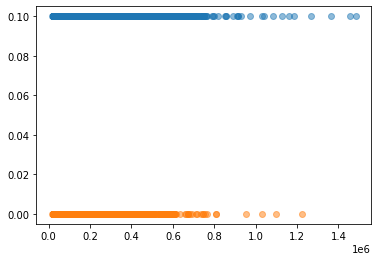

In [20]:
plt.scatter(x = data['fnlwgt'][data['income'] == ' <=50K'], y = np.zeros_like(data['fnlwgt'][data['income'] == ' <=50K']) + 0.1,
           alpha = 0.5)
plt.scatter(x = data['fnlwgt'][data['income'] == ' >50K'], y = np.zeros_like(data['fnlwgt'][data['income'] == ' >50K']),
            alpha = 0.5)
plt.show()

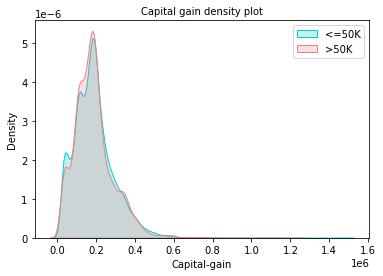

In [21]:
plt.figure()
ax = sns.kdeplot(data["fnlwgt"][data.income == ' <=50K'], color="darkturquoise", shade=True)
sns.kdeplot(data["fnlwgt"][data.income == ' >50K'], color="lightcoral", shade=True)
plt.legend(['<=50K', '>50K'])
plt.title('Capital gain density plot',fontsize = 10)
ax.set(xlabel='Capital-gain')
# plt.xlim(-20000,20000)
plt.show()

On internet search, it is found that,It is a weight assigned by the Census Bureau. The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. Say sample 7,12 and 33 are having similar fnlwgt values they are more likely to be of the same race, similar educational and social background, etc.. but they are not standardized across different states. So someone in California might share similar fnlwgt with somebody in N Dakota but might have entirely different socio-economic background. 
 
It is difficult to visualize any patters of such. Due to lack of information, we consider dropping this feature.

In [22]:
data = data.drop('fnlwgt',axis = 1)

**3. Education-num**

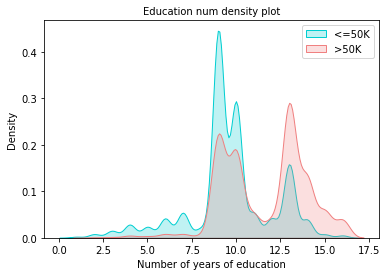

In [23]:
plt.figure()
ax = sns.kdeplot(data["education-num"][data.income == ' <=50K'], color="darkturquoise", shade=True)
sns.kdeplot(data["education-num"][data.income == ' >50K'], color="lightcoral", shade=True)
plt.legend(['<=50K', '>50K'])
plt.title('Education num density plot',fontsize = 10)
ax.set(xlabel='Number of years of education')
plt.show()

- Education-num doesn't show Gaussian Characteristics as bimodal characteristic is seen. Also, there will be correlation between education and education num. To prevent multi-collinearity, Education-num is dropped.

In [24]:
data.drop('education-num',axis = 1, inplace = True)

**4. Hours-per-week**

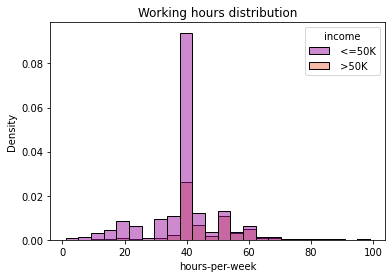

In [25]:
sns.histplot(data = data, x = 'hours-per-week', bins = 24,stat = 'density',hue = 'income',palette = 'plasma')
plt.title('Working hours distribution')
plt.grid(False)
#plt.savefig('Hoursperweek')
plt.show()

Working hours histogram plot

## Categorial Variables

**1. Workclass**

In [26]:
print(data['workclass'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


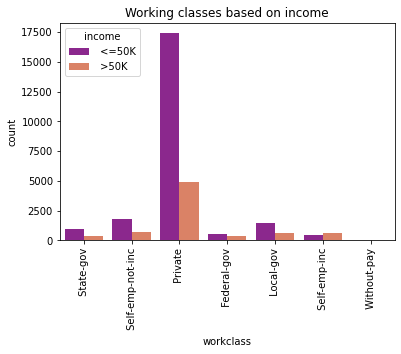

In [27]:
sns.countplot(data = data, x = 'workclass',hue = 'income', palette = 'plasma')
plt.xticks(rotation = 90)
plt.title('Working classes based on income')
plt.grid(False)
#plt.savefig('Workclass')
plt.show()

- People in the private sector face significant difference in the pay scale. A lot of people earn below 50k and around one third earn above. 
- There aren't as much differences that exist in the government sector compared to private ones.
- Self employed inc is the only category where there are more number of people earning above 50k than below. We could say when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
- There are not much data available for people without pay

**2. Education**

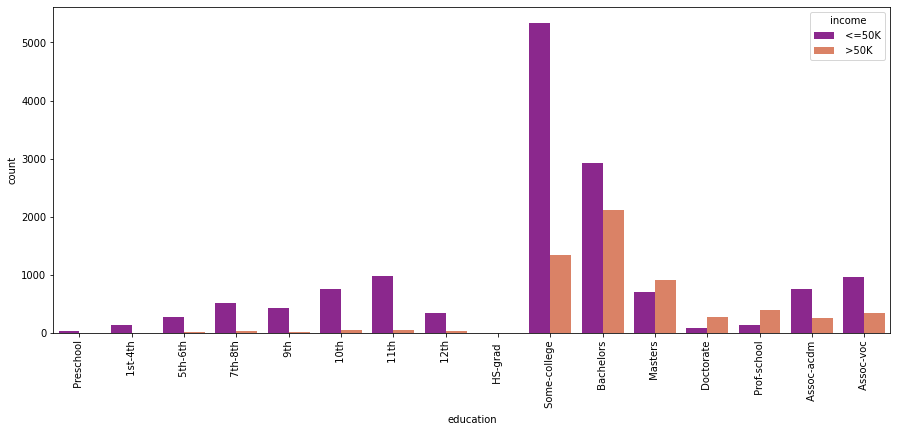

In [28]:
# before transformation
plt.figure(figsize=(15,6))
order_list = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', 
                ' HS-grad ', ' Some-college', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school', 
              ' Assoc-acdm', ' Assoc-voc']
sns.countplot(data = data, x = 'education', hue = 'income', palette = 'plasma', order = order_list)
plt.xticks(rotation = 90)
plt.grid(False)
#plt.savefig('Educationbeforeclean')
plt.show()

- People who have completed less than 12th standard rarely earn above 50K. The distribution for people below 12th are almost similar with most earning considerably less. We could group education less than 12th into a single group. This would make probability estimates accurate, especially useful in a naive bayes classifier.
- People who have completed Bachelors, Masters, Doctorate, Prof-School significantly are on the higher pay scale implying education does matter to a certain extent.

In [29]:
def education_clean(x):
    if x in [' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th']:
        return 'Upto 12th' 
    else:
        return x

In [30]:
data['education_reduced'] = data['education'].apply(education_clean)
data.drop('education',axis = 1, inplace = True)

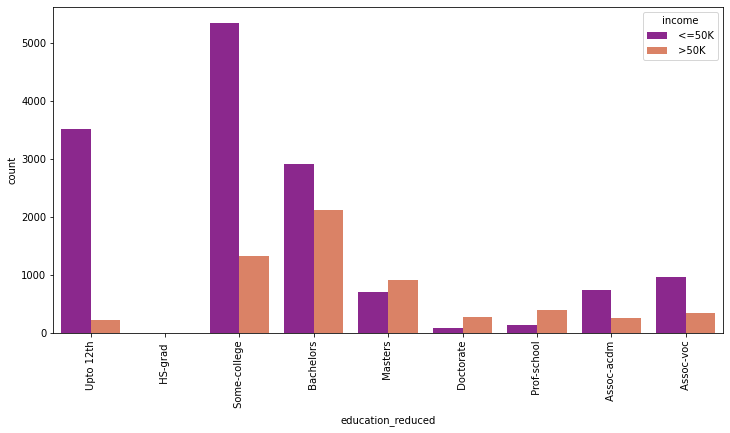

In [31]:
# After transformation
plt.figure(figsize=(12,6))
order_list = ['Upto 12th', ' HS-grad ', ' Some-college', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school', 
              ' Assoc-acdm', ' Assoc-voc']
sns.countplot(data = data, x = 'education_reduced', hue = 'income', palette = 'plasma', order = order_list)
plt.xticks(rotation = 90)
#plt.savefig('Educationaftercleaned')
plt.show()

In [32]:
data.columns

Index(['age', 'workclass', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'education_reduced'],
      dtype='object')

**3. Marital Status**

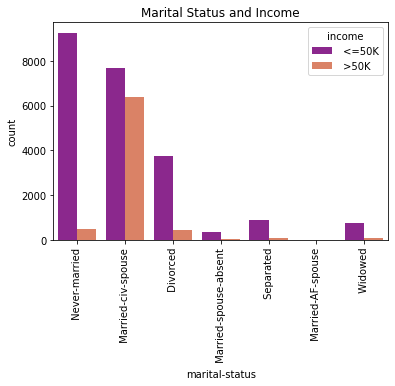

In [33]:
sns.countplot(data = data, x = 'marital-status',hue = 'income', palette = 'plasma')
plt.xticks(rotation = 90)
plt.title('Marital Status and Income')
plt.show()

- Married-civ-spouse is the only category which has comparable number of people belonging to both categories of income.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

**4. Occupation**

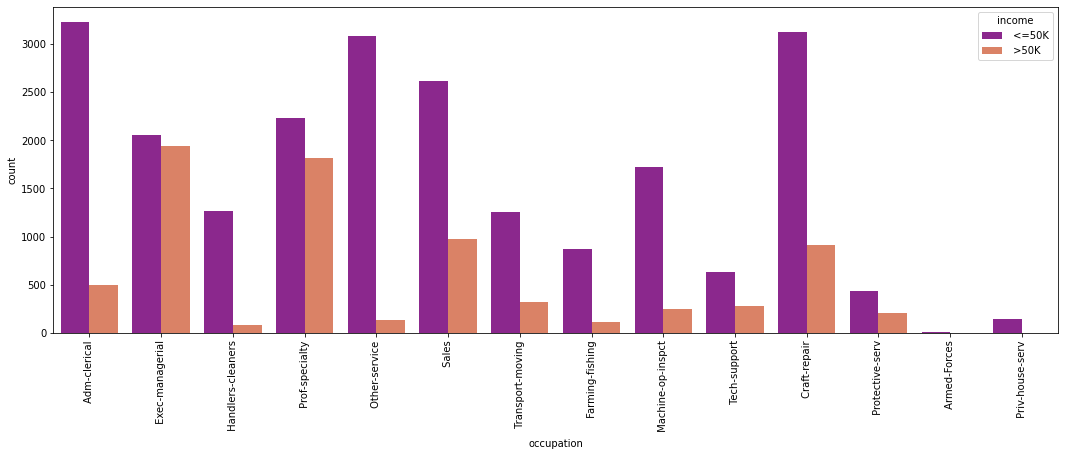

In [34]:
plt.figure(figsize=(18,6))
sns.countplot(data = data,x = 'occupation', palette = 'plasma', hue=  'income')
plt.xticks(rotation = 90)
#plt.savefig('Occupation')
plt.show()

- Exec-managerial role, Prof-specialty roles likely to earn more than 50K dollars an year.
- Adm-clerical, Handlers-cleaners, Other-service, Farming-fishing, Machine-op-inspect, Transport-moving are less likely to earn more than 50K dollars an year.

**5. Relationship**

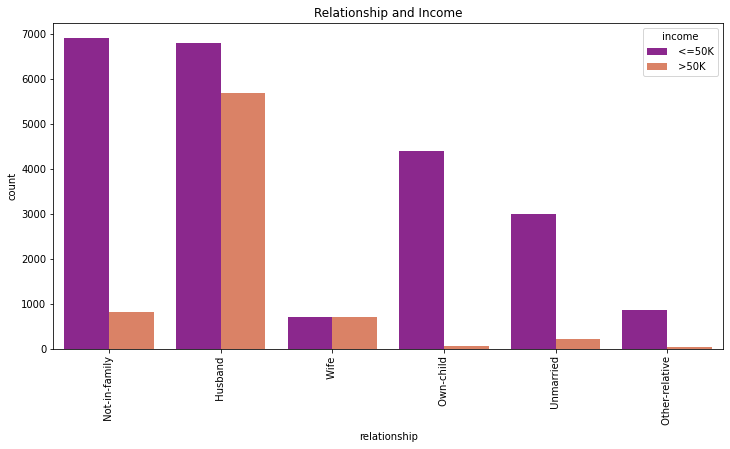

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data = data, x = 'relationship', hue = 'income', palette='plasma')
plt.title('Relationship and Income')
plt.xticks(rotation = 90)
plt.show()

These are the relationship and income categorical plots

**6. Race**

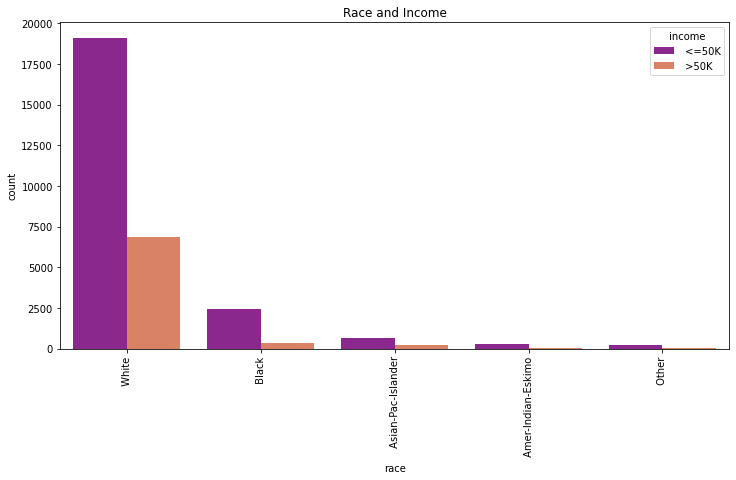

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data = data, x = 'race', hue = 'income', palette='plasma')
plt.title('Race and Income')
plt.xticks(rotation = 90)
plt.show()

These are the race and income categorical Plots

**7. Sex**

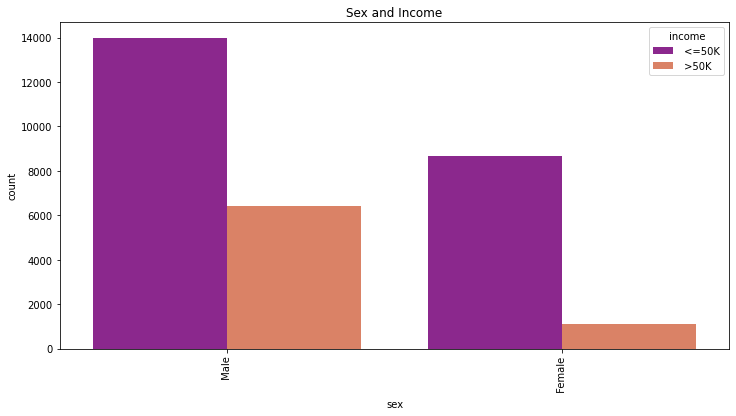

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data = data, x = 'sex', hue = 'income', palette='plasma')
plt.title('Sex and Income')
plt.xticks(rotation = 90)
plt.grid(False)
#plt.savefig('sex')
plt.show()

- Less than 10 % of Females earn more than 50K dollars an year.
- 33% of Males earn more than 50K dollars an year.


## Data Cleaning

In [38]:
cat_cols = ['workclass','education_reduced','marital-status','occupation','relationship','race','sex','native-country']
num_cols = ['age','capital-gain','capital-loss','hours-per-week']

In [39]:
# converting income to 0's (less than 50K) and 1's (more than 50K)
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})

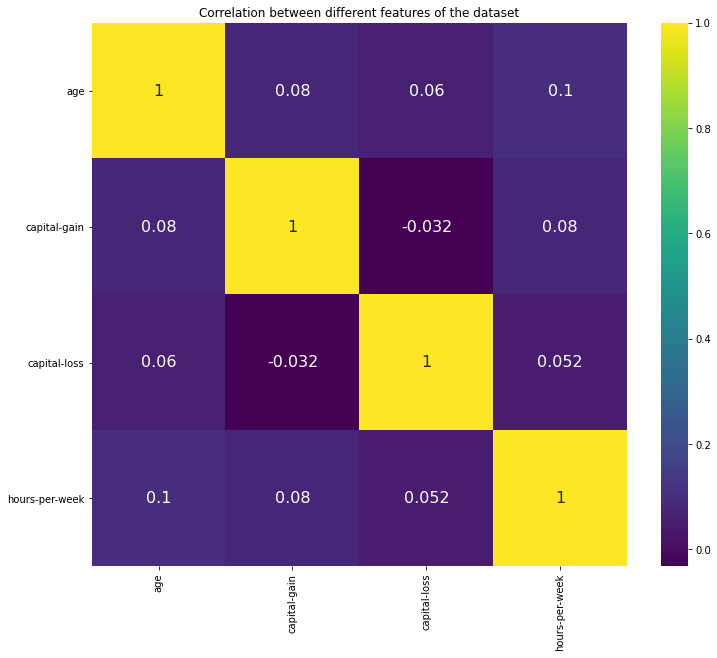

In [40]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset")
sns.heatmap(data[num_cols].corr(), cmap = 'viridis', annot = True,annot_kws={"size":16})
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
# plt.savefig('Correlation.png')
plt.show()

## Model Implementation

In [41]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [42]:
# Stratified Kfold split (train and test)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

for train_index, test_index in split.split(data,data['income']):
    data_train = data.iloc[train_index]
    data_test = data.iloc[test_index] 
    
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace = True)

In [43]:
# Stratified Kfold split (cross validation and test)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.5, random_state = 42)

for cval_index, test_index in split.split(data_test,data_test['income']):
    data_cval = data_test.iloc[cval_index]
    data_test = data_test.iloc[test_index] 
    
data_cval.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace = True)

In [44]:
# Encoding categorical variables
label_encoder_dict = {}

for feature in cat_cols:
    label_encoder_dict[feature] = LabelEncoder()
    data_train[feature] = label_encoder_dict[feature].fit_transform(data_train[feature])
    data_cval[feature] = label_encoder_dict[feature].transform(data_cval[feature])
    data_test[feature] = label_encoder_dict[feature].transform(data_test[feature])


C:\Users\VIGNESH S\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
X_train = data_train.drop('income',axis = 1)
y_train = data_train['income']

X_cval = data_cval.drop('income',axis = 1)
y_cval = data_cval['income']

X_test = data_test.drop('income',axis = 1)
y_test = data_test['income']

### Approach: 

- Use categorical NB for categorical feautures
- Use Gaussian NB for numerical features
- Combine both of them 

In [61]:
class MixedNB:
    def __init__(self,cat_cols, num_cols, alpha = None, prior = None):
        from sklearn.naive_bayes import CategoricalNB, GaussianNB
        if alpha:
            self.alpha = alpha
        else:
            self.alpha = 1.0
            
        self.prior = prior
        self.cat_cols = cat_cols 
        self.num_cols = num_cols
        self.clf1 = CategoricalNB(alpha = self.alpha, class_prior = self.prior)
        self.clf2 = GaussianNB(priors = np.array([0.5,0.5]))
        
    def fit(self, X,y, sample_weight = None):
        self.clf1.fit(X[self.cat_cols],y)
        self.clf2.fit(X[self.num_cols],y)
        self.class_prior_ = self.clf2.class_prior_
        
    def predict_proba(self,X):
        proba1 = self.clf1.predict_proba(X[self.cat_cols])
        proba2 = self.clf2.predict_proba(X[self.num_cols])
        proba = proba1*proba2
        proba = proba/(proba.sum(axis = 1, keepdims =1)) 
        return proba 
    
    def predict(self,X):
        proba = self.predict_proba(X)
        return np.argmax(proba,axis = 1)
    
    def score(self,X,y):
        from sklearn.metrics import accuracy_score

        return accuracy_score(y, self.predict(X))

### Model 1: With prior

In [62]:
prior = None
clf1 = MixedNB(cat_cols, num_cols, alpha = 1e-9, prior = prior)
clf1.fit(X_train,y_train)
y_train_pred1 = clf1.predict(X_train)
y_cval_pred1 = clf1.predict(X_cval)

### Model 2: Without Prior (Uniform Prior)

In [63]:
prior2 = np.array([0.5,0.5])
clf2 = MixedNB(cat_cols, num_cols, alpha = 1e-9, prior = prior2)
clf2.fit(X_train,y_train)
y_train_pred2 = clf2.predict(X_train)
y_cval_pred2 = clf2.predict(X_cval)

## Model Evaluation

### Model 1: (With Prior)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

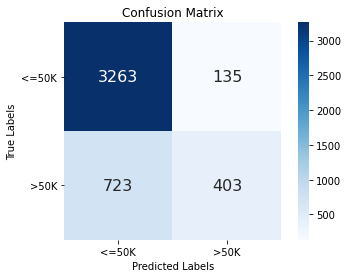

In [50]:
cm1 = confusion_matrix(y_cval,y_cval_pred1)
ax = plt.subplot()
sns.heatmap(cm1, square = True, annot = True, cbar=  True, cmap = 'Blues', fmt = 'g', 
           xticklabels=['<=50K','>50K'],yticklabels=['<=50K','>50K'],ax=ax,annot_kws={"size":16})
ax.set_xlabel('Predicted Labels')
plt.yticks(rotation = 0)
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# plt.savefig('CMwithprior')
plt.show()

In [51]:
def evaluation(y,y_pred):
    print('Accuracy: ', accuracy_score(y,y_pred))
    print('Precision: ', precision_score(y,y_pred))
    print('Recall: ', recall_score(y,y_pred))
    print('F1 Score: ', f1_score(y,y_pred)) 

In [52]:
evaluation(y_train,y_train_pred1)

Accuracy:  0.8045753800975702
Precision:  0.7186532507739938
Recall:  0.353310502283105
F1 Score:  0.47372448979591836


### Model 2: (Without Prior/ Uniform Prior)

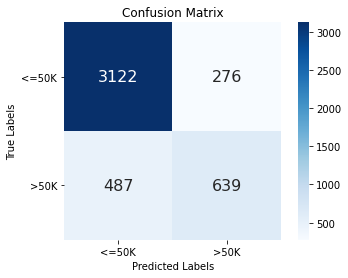

In [53]:
cm2 = confusion_matrix(y_cval,y_cval_pred2)
ax = plt.subplot()
sns.heatmap(cm2, square = True, annot = True, cbar=  True, cmap = 'Blues', fmt = 'g', 
           xticklabels=['<=50K','>50K'],yticklabels=['<=50K','>50K'],ax=ax, annot_kws={"size":16})
ax.set_xlabel('Predicted Labels')
plt.yticks(rotation = 0)
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# plt.savefig("CMuniformprior")
plt.show()

In [54]:
evaluation(y_train,y_train_pred2)

Accuracy:  0.8268365462037607
Precision:  0.6846722068328717
Recall:  0.5643074581430746
F1 Score:  0.6186900292031707


## Precision and ROC curves

In [1]:
def precision_curve(clf,X,y):
    from sklearn.metrics import precision_recall_curve
    y_scores = clf.predict_proba(X)
    y_scores = y_scores[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
    plt.show()

In [2]:
def roc_curve(clf, X, y):
    from sklearn.metrics import roc_auc_score, roc_curve
    y_scores = clf1.predict_proba(X)
    y_scores = y_scores[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Auc Curve')
#     plt.savefig('Roccurve')
    plt.show()

In [3]:
# Threshold tuning is not done. This is just for visualization purposes
precision_curve(clf1,X_train,y_train)

NameError: name 'clf1' is not defined

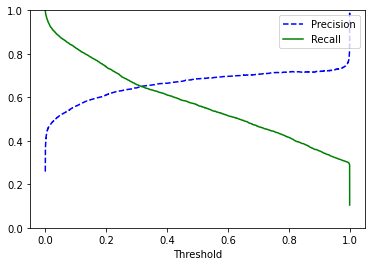

In [58]:
# Threshold tuning is not done. This is just for visualization purposes
precision_curve(clf2,X_train,y_train)

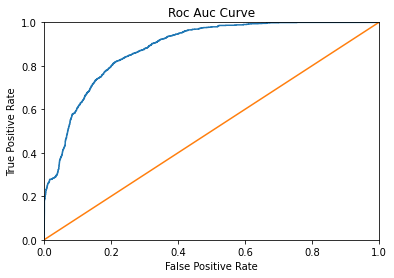

In [59]:
roc_curve(clf2,X_test,y_test)

In [60]:
# Auc roc score
from sklearn.metrics import roc_auc_score
y_scores = clf2.predict_proba(X_test)
y_scores = y_scores[:,1]
roc_auc_score(y_test, y_scores)

0.881644611804642